# 0.0. Imports

In [1]:
# Importing Libraries
import pickle
import numpy                        as np
import pandas                       as pd
import seaborn                      as sns
import matplotlib.pyplot            as plt
import scikitplot                   as skplt

from sklearn import preprocessing   as pp
from sklearn import model_selection as ms
from sklearn import ensemble        as en
from sklearn import neighbors       as nh
from sklearn import linear_model    as lm

# 1.0. Data Description

In [2]:
# Import Data
df = pd.read_csv('../data/train.csv')

## 1.1. Data Dimension

In [3]:
display(df.head(2))
print( 'Columns: {}'.format( df.shape[1] ) )
print( 'Rows: {}'.format( df.shape[0] ) )

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


Columns: 12
Rows: 381109


## 1.2. Data Types, NA and Unique

In [4]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
id,int64,381109,0
Gender,object,2,0
Age,int64,66,0
Driving_License,int64,2,0
Region_Code,float64,53,0
Previously_Insured,int64,2,0
Vehicle_Age,object,3,0
Vehicle_Damage,object,2,0
Annual_Premium,float64,48838,0
Policy_Sales_Channel,float64,155,0


## 1.4. Data Descriptive

In [5]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

In [6]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std', 'Skew', 'Kurtosis']
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,Age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,Driving_License,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,Region_Code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,Previously_Insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,Annual_Premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,Policy_Sales_Channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,Vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,Response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature Engineering

In [7]:
# Create Copy for this session
df2 = df.copy()

In [8]:
# Vehicle Damage
df2['Vehicle_Damage'] = df2['Vehicle_Damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

# Vehicle Age
df2['Vehicle_Age'] =  df2['Vehicle_Age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' ) 

# 3.0 Exploratory Data Analysis

In [9]:
# Create Copy for this session
df3 = df2.copy()

## 3.1. Univariate Analysys

### 3.1.1 Age

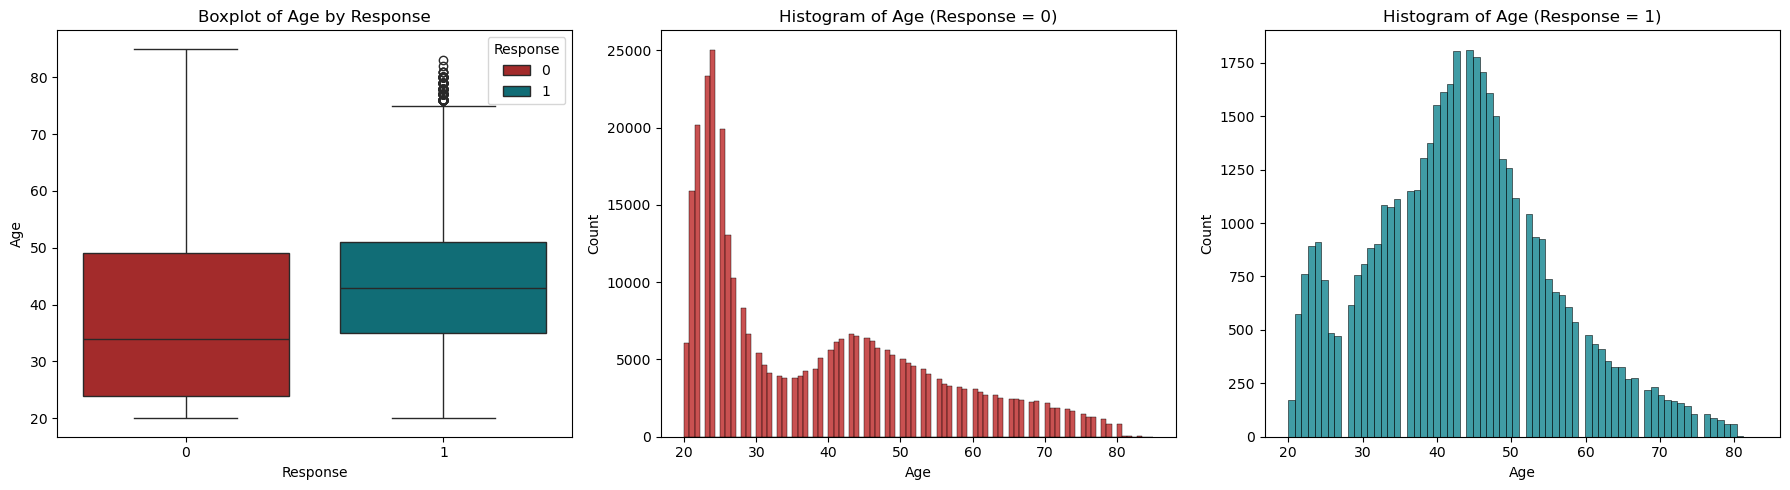

In [10]:
# Defining colors
color_pos = '#007b87'
color_neg = '#B71717'

# Create the figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot for "Age" by "Response" with custom colors
sns.boxplot(x='Response', y='Age', data=df3, ax=axes[0], hue='Response', palette={0: color_neg, 1: color_pos})
axes[0].set_title('Boxplot of Age by Response')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Age')

# Histogram for "Age" when Response = 0
aux00 = df3.loc[df3['Response'] == 0, 'Age']
sns.histplot(aux00, ax=axes[1], color=color_neg)  
axes[1].set_title('Histogram of Age (Response = 0)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Histogram for "Age" when Response = 1
aux00 = df3.loc[df3['Response'] == 1, 'Age']
sns.histplot(aux00, ax=axes[2], color=color_pos)  
axes[2].set_title('Histogram of Age (Response = 1)')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()

### 3.1.2 - Gender

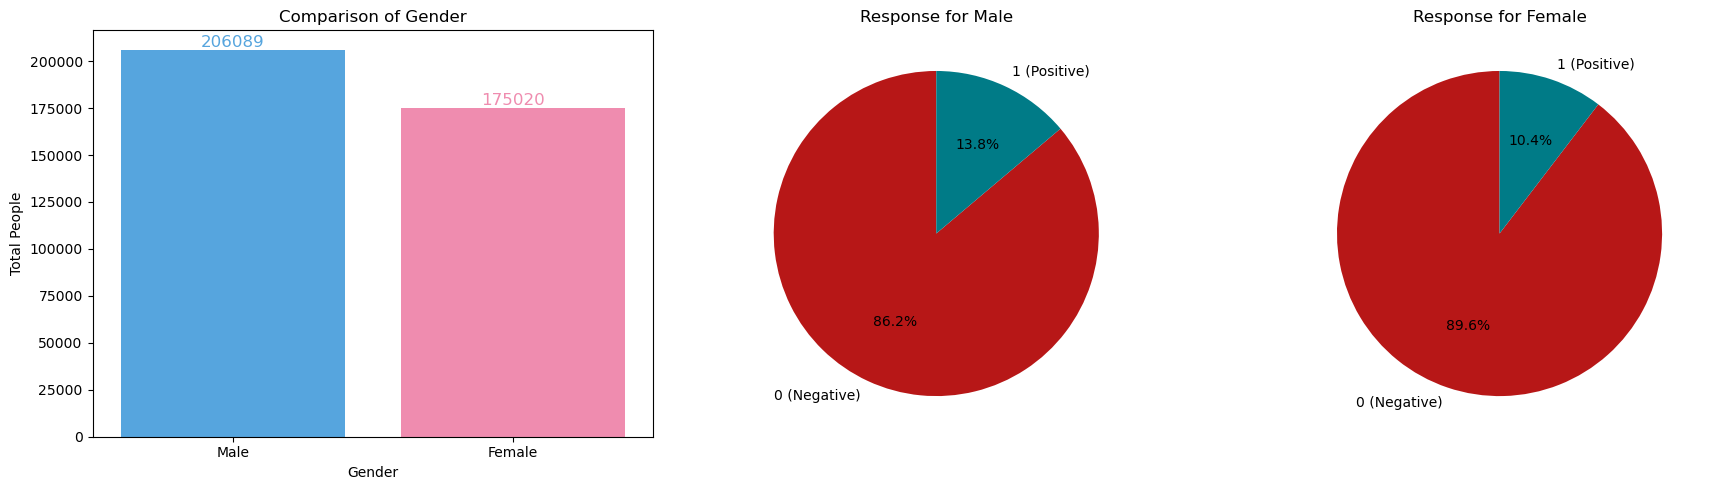

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar tabela cruzada e normalizar para obter porcentagens
df_perc = pd.crosstab(df3['Gender'], df3['Response']).apply(lambda x: x / x.sum(), axis=1)

# Criar DataFrame para o gráfico de barras comparando motoristas vs. não-motoristas
aux = df3['Gender'].value_counts().reset_index()
aux.columns = ['Gender', 'Count']

# Definir cores para as categorias de gênero
gender_colors = {'Male': '#3FA9F5', 'Female': "#FF7BAA"}

# Criar uma figura com 3 colunas para os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de barras comparando o total de motoristas vs. não-motoristas (Primeiro gráfico)
sns.barplot(x='Gender', y='Count', hue='Gender', data=aux, 
            palette=gender_colors, ax=axes[0], legend=False)
axes[0].set_title('Comparison of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total People')
axes[0].set_xticks([0, 1])  # Garantir que as marcações estão corretas
axes[0].set_xticklabels(['Male', 'Female'])

# Adicionar rótulos nas barras com a mesma cor das barras
for bar in axes[0].patches:
    height = bar.get_height()
    if height > 0:  # Evitar rótulos em barras com altura zero
        axes[0].text(
            bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color=bar.get_facecolor()
        )

# Gráfico de pizza para pessoas que NÃO dirigem (Driving_License = 0) (Segundo gráfico)
df_perc.loc['Male'].plot(kind='pie', autopct='%1.1f%%', labels=['0 (Negative)', '1 (Positive)'], 
                          colors=[color_neg, color_pos], ax=axes[1], startangle=90)
axes[1].set_ylabel('')  
axes[1].set_title('Response for Male')

# Gráfico de pizza para pessoas que DIRIGEM (Driving_License = 1) (Terceiro gráfico)
df_perc.loc['Female'].plot(kind='pie', autopct='%1.1f%%', labels=['0 (Negative)', '1 (Positive)'], 
                           colors=[color_neg, color_pos], ax=axes[2], startangle=90)
axes[2].set_ylabel('')  
axes[2].set_title('Response for Female')

# Ajustar layout
plt.tight_layout()
plt.show()


### 3.1.3 - Driving License

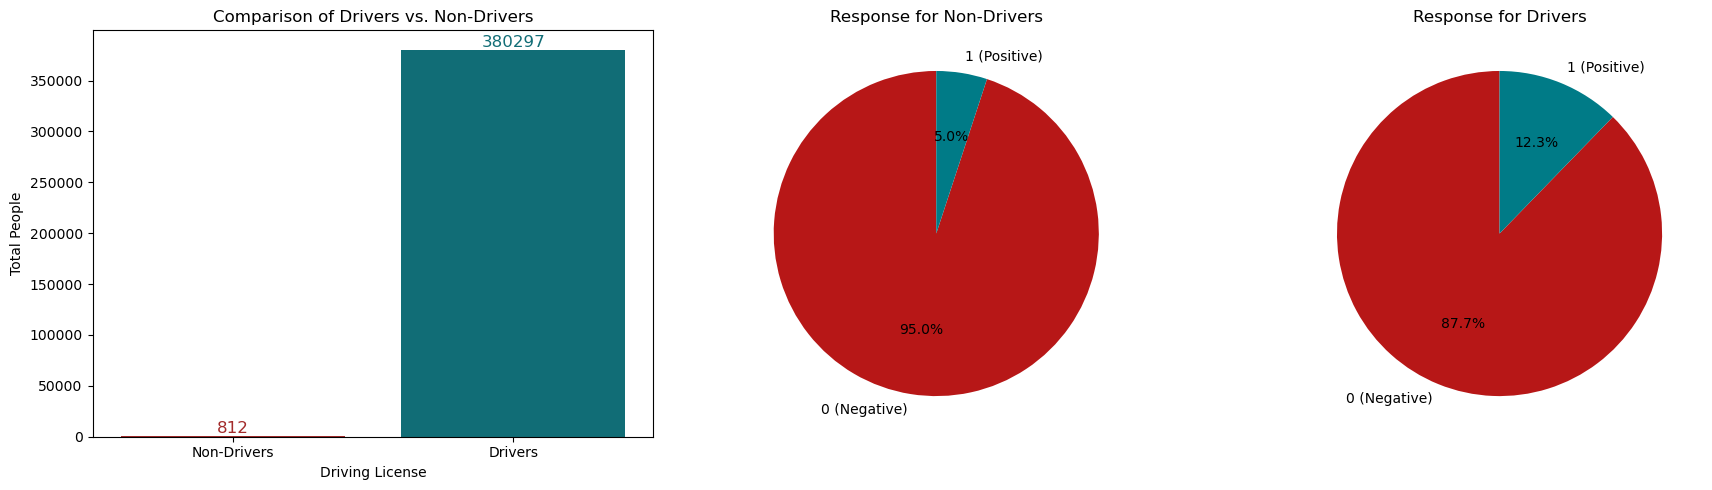

In [12]:
# Create a cross-tabulated table and normalize to get percentages
df_perc = pd.crosstab(df3['Driving_License'], df3['Response']).apply(lambda x: x / x.sum(), axis=1)

# Create DataFrame for the bar chart comparing drivers vs. non-drivers
aux = df3['Driving_License'].value_counts().reset_index()
aux.columns = ['Driving_License', 'Count']

# Create a figure with 3 columns for the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar chart comparing total number of drivers vs. non-drivers (First chart)
sns.barplot(x='Driving_License', y='Count', hue='Driving_License', data=aux, 
            palette={0: color_neg, 1: color_pos}, ax=axes[0], legend=False)
axes[0].set_title('Comparison of Drivers vs. Non-Drivers')
axes[0].set_xlabel('Driving License')
axes[0].set_ylabel('Total People')
axes[0].set_xticks([0, 1])  # Ensure ticks are correctly set before applying labels
axes[0].set_xticklabels(['Non-Drivers', 'Drivers'])

# Add labels with the same color as the bars
for bar in axes[0].patches:
    height = bar.get_height()
    if height > 0:  # Avoid placing labels on zero-height bars
        axes[0].text(
            bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color=bar.get_facecolor()
        )


# Pie chart for people who DO NOT drive (Driving_License = 0) (Second chart)
df_perc.loc[0].plot(kind='pie', autopct='%1.1f%%', labels=['0 (Negative)', '1 (Positive)'], 
                    colors=[color_neg, color_pos], ax=axes[1], startangle=90)
axes[1].set_ylabel('')  
axes[1].set_title('Response for Non-Drivers')

# Pie chart for people who DO drive (Driving_License = 1) (Third chart)
df_perc.loc[1].plot(kind='pie', autopct='%1.1f%%', labels=['0 (Negative)', '1 (Positive)'], 
                    colors=[color_neg, color_pos], ax=axes[2], startangle=90)
axes[2].set_ylabel('')  
axes[2].set_title('Response for Drivers')

# Adjust layout
plt.tight_layout()
plt.show()

### 3.1.4 - Region Code

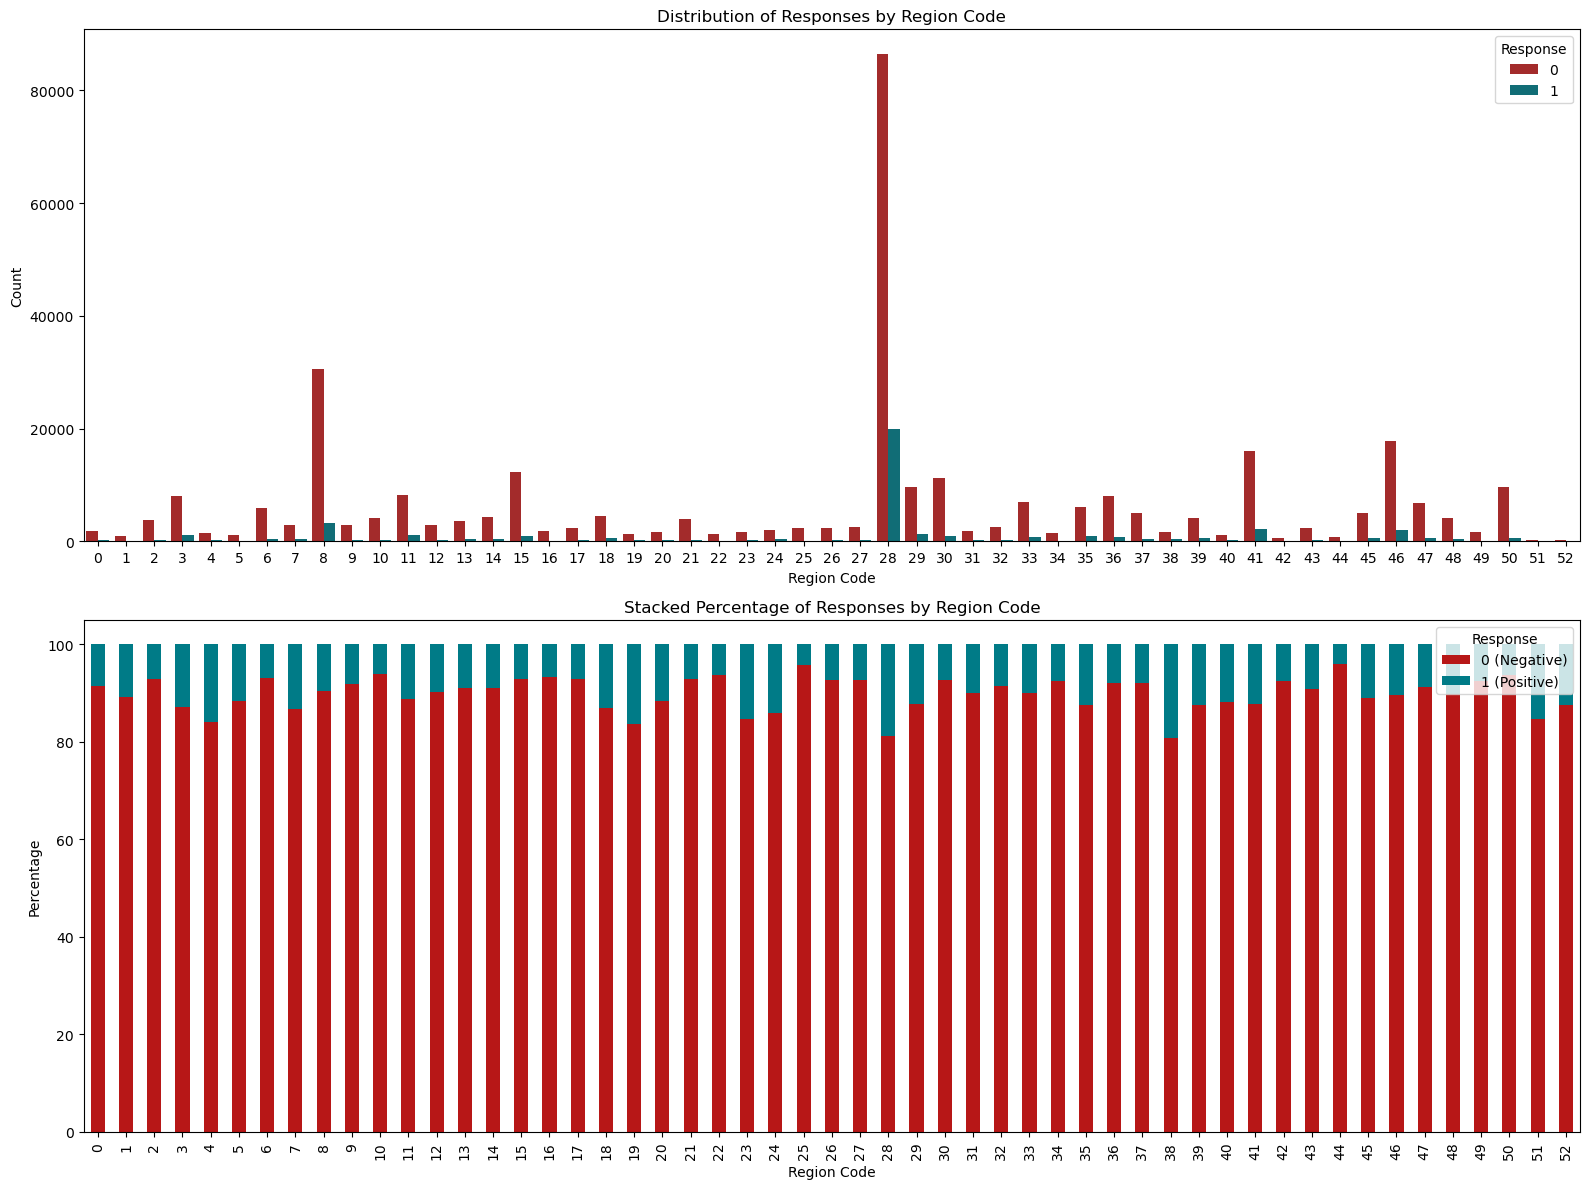

In [13]:
# Group and count records by Region_Code and Response
aux0 = df3[['id', 'Region_Code', 'Response']].groupby(['Region_Code', 'Response']).count().reset_index()

# Convert Region_Code to string to avoid decimal places
aux0['Region_Code'] = aux0['Region_Code'].astype(int)

# Create the first bar chart
plt.figure(figsize=(16, 12))  # Increased height to fit both charts

# Primeiro gráfico: barra com a distribuição de respostas por Region_Code
ax1 = plt.subplot(2, 1, 1)  # Subplot para o gráfico superior
sns.barplot(x='Region_Code', y='id', hue='Response', data=aux0, palette={0: color_neg, 1: color_pos}, ax=ax1)

# Ajustes visuais para o gráfico de barras
ax1.set_title('Distribution of Responses by Region Code')
ax1.set_xlabel('Region Code')
ax1.set_ylabel('Count')
ax1.legend(title='Response')

# Agrupar e calcular as porcentagens para o gráfico de barras empilhadas
aux1 = aux0.pivot_table(index='Region_Code', columns='Response', values='id', aggfunc='sum', fill_value=0)
aux1 = aux1.div(aux1.sum(axis=1), axis=0) * 100  # Converter para porcentagem

# Segundo gráfico: barra empilhada com a distribuição de porcentagens por Region_Code
ax2 = plt.subplot(2, 1, 2)  # Subplot para o gráfico inferior
aux1.plot(kind='bar', stacked=True, ax=ax2, color=[color_neg, color_pos])

# Ajustes visuais para o gráfico empilhado
ax2.set_title('Stacked Percentage of Responses by Region Code')
ax2.set_xlabel('Region Code')
ax2.set_ylabel('Percentage')
ax2.legend(title='Response', labels=['0 (Negative)', '1 (Positive)'], loc='upper right')

# Ajuste para o layout e exibição do gráfico
plt.tight_layout()
plt.show()

### 3.1.5 - Previosly Insured

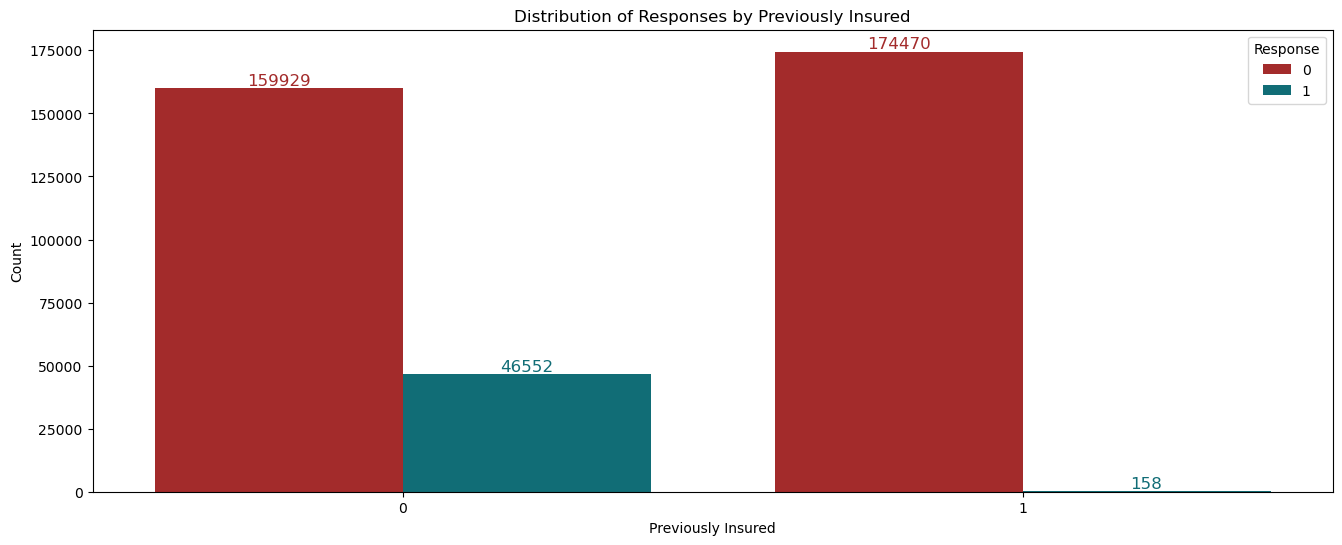

In [14]:
# Group and count records by Previously_Insured and Response
aux0 = df3[['id', 'Previously_Insured', 'Response']].groupby(['Previously_Insured', 'Response']).count().reset_index()

# Create the bar chart with increased width
plt.figure(figsize=(16, 6))  
ax = sns.barplot(x='Previously_Insured', y='id', hue='Response', data=aux0, palette={0: color_neg, 1: color_pos})

# Add labels with respective bar colors
for bars, response in zip(ax.containers, [0, 1]):  
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on zero-height bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom', fontsize=12, color=bar.get_facecolor()
            )

# Visual adjustments
plt.title('Distribution of Responses by Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.legend(title='Response')

# Show the plot
plt.show()

### 3.1.6 - Vehicle Age

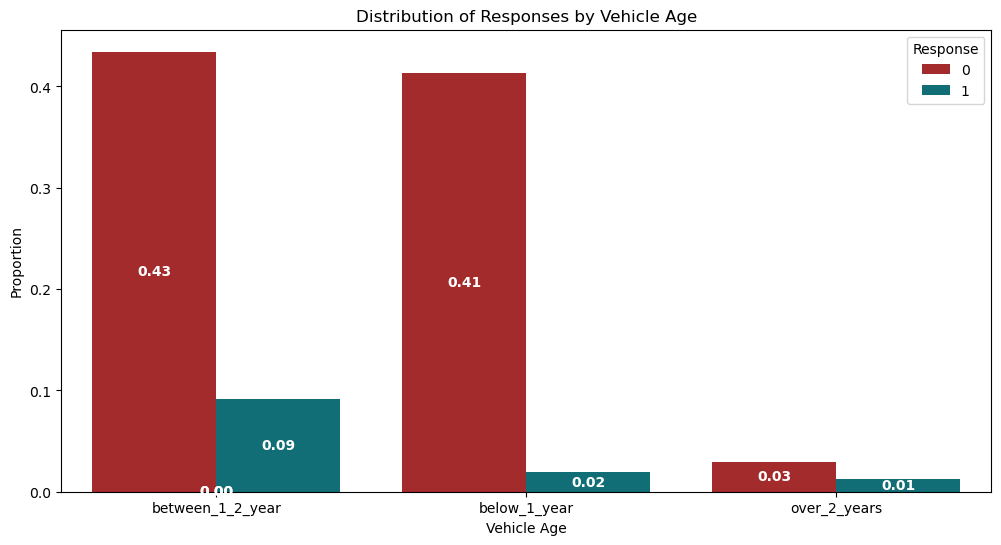

In [15]:
# Group and count the records by Vehicle_Age and Response
aux0 = df3[['Vehicle_Age', 'Response']].value_counts(normalize=True).reset_index(name='Proportion')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Vehicle_Age', y='Proportion', hue='Response', data=aux0, palette={0: color_neg, 1: color_pos})

# Add labels on top of the bars with the respective colors
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    x = p.get_x() + p.get_width() / 2  # Get the x position of the bar
    y = p.get_y() + height / 2  # Get the y position of the bar
    ax.text(x, y, f'{height:.2f}', ha="center", va="center", color="white", fontweight="bold")

# Visual adjustments
plt.title('Distribution of Responses by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Proportion')
plt.legend(title='Response')

# Show the plot
plt.show()

### 3.1.7 - Vehicle Damage

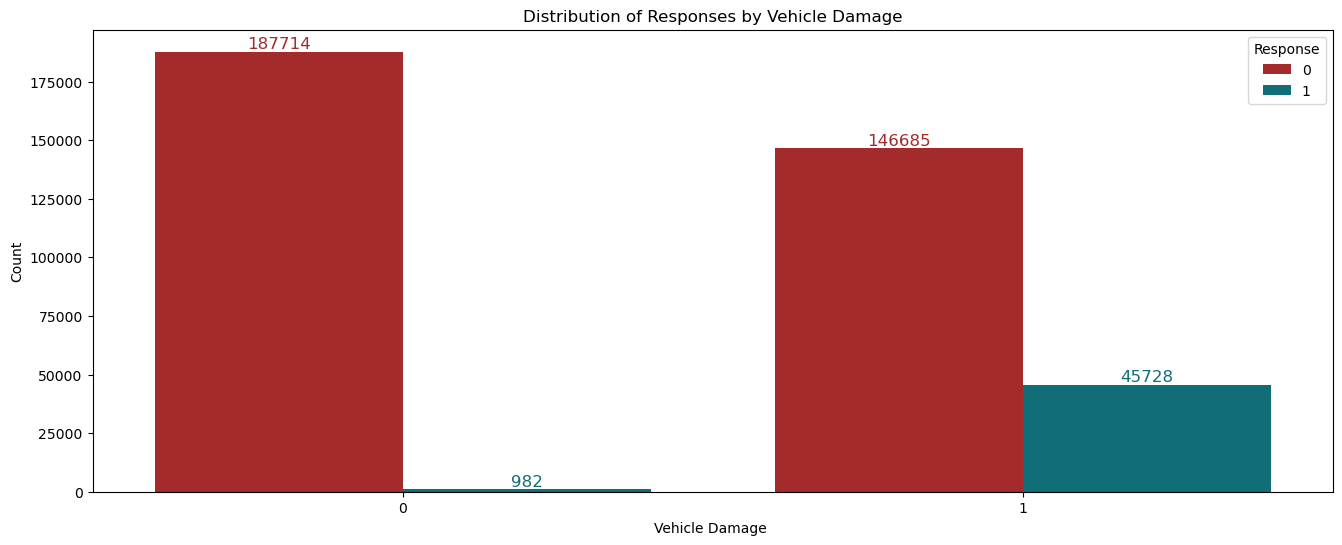

In [16]:
# Group and count records by Previously_Insured and Response
aux0 = df3[['id', 'Vehicle_Damage', 'Response']].groupby(['Vehicle_Damage', 'Response']).count().reset_index()

# Create the bar chart with increased width
plt.figure(figsize=(16, 6))  
ax = sns.barplot(x='Vehicle_Damage', y='id', hue='Response', data=aux0, palette={0: color_neg, 1: color_pos})

# Add labels with respective bar colors
for bars, response in zip(ax.containers, [0, 1]):  
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on zero-height bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom', fontsize=12, color=bar.get_facecolor()
            )

# Visual adjustments
plt.title('Distribution of Responses by Vehicle Damage')
plt.xlabel('Vehicle Damage ')
plt.ylabel('Count')
plt.legend(title='Response')

# Show the plot
plt.show()

### 3.1.8 - Anual Premium

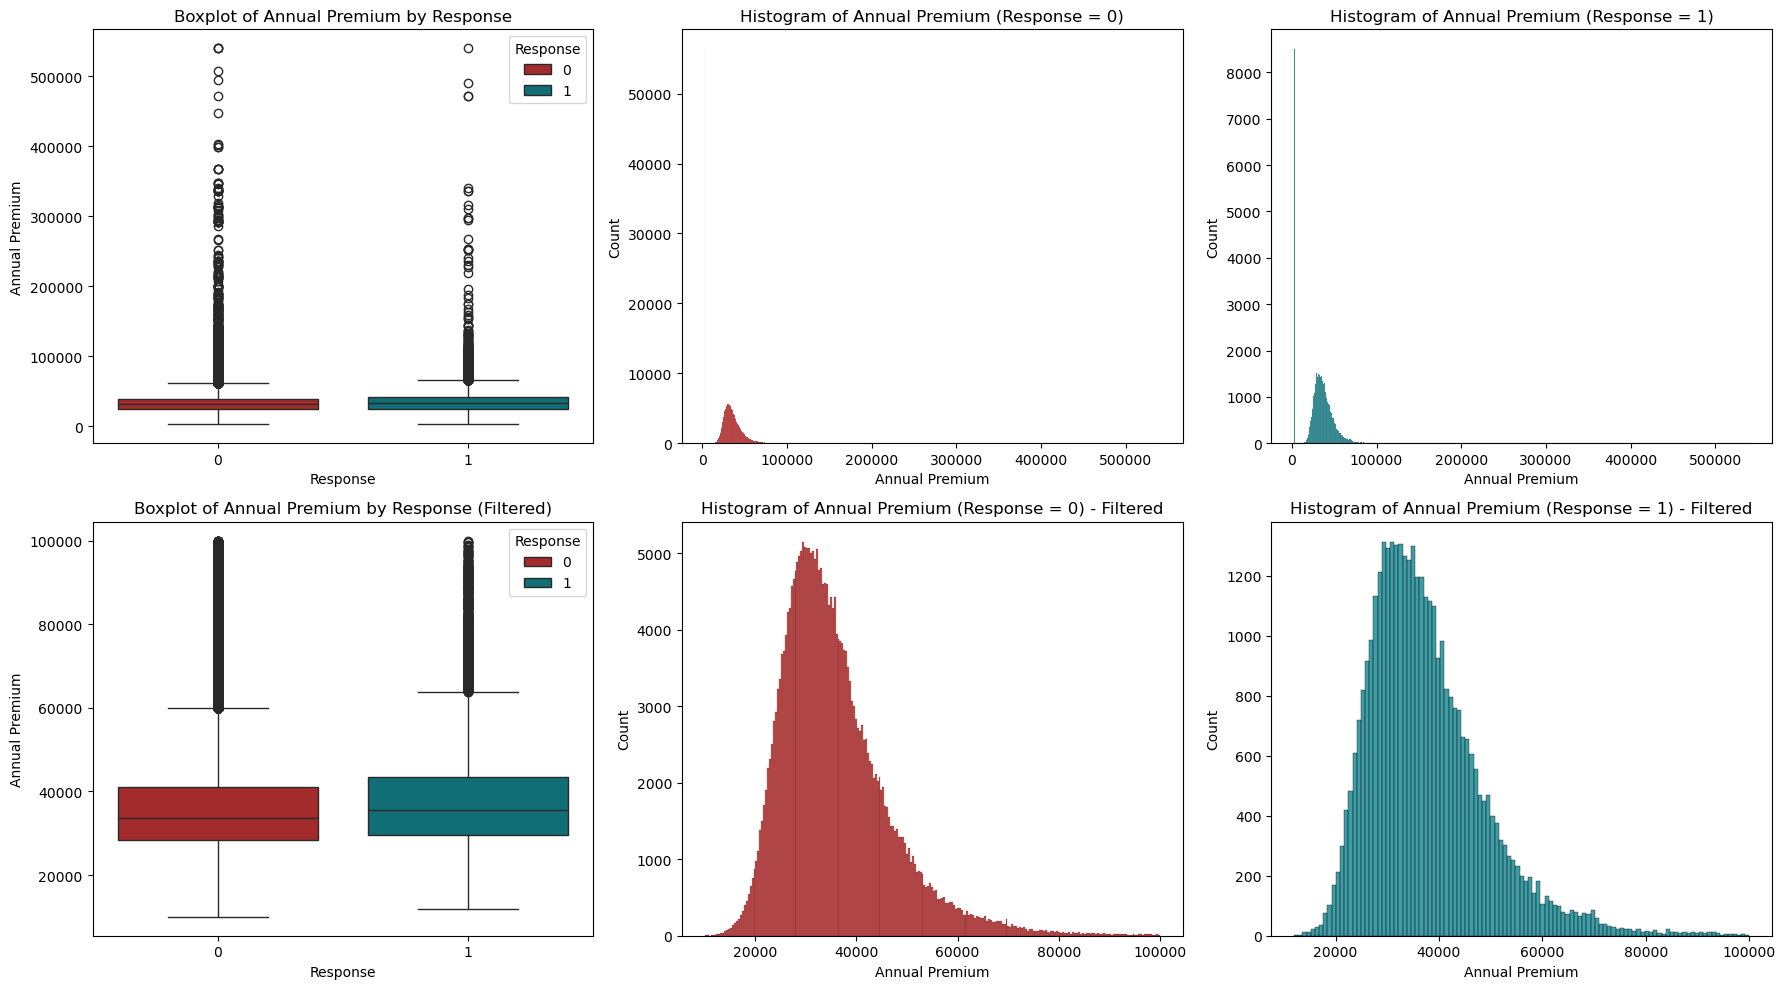

In [17]:
# Create the figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# ---------- First row (without filter) ----------
# Boxplot for "Annual_Premium" by "Response"
sns.boxplot(x='Response', y='Annual_Premium', data=df3, ax=axes[0, 0], hue='Response', palette={0: color_neg, 1: color_pos})
axes[0, 0].set_title('Boxplot of Annual Premium by Response')
axes[0, 0].set_xlabel('Response')
axes[0, 0].set_ylabel('Annual Premium')

# Histogram for "Annual_Premium" when Response = 0
sns.histplot(df3.loc[df3['Response'] == 0, 'Annual_Premium'], ax=axes[0, 1], color=color_neg)  
axes[0, 1].set_title('Histogram of Annual Premium (Response = 0)')
axes[0, 1].set_xlabel('Annual Premium')
axes[0, 1].set_ylabel('Count')

# Histogram for "Annual_Premium" when Response = 1
sns.histplot(df3.loc[df3['Response'] == 1, 'Annual_Premium'], ax=axes[0, 2], color=color_pos)  
axes[0, 2].set_title('Histogram of Annual Premium (Response = 1)')
axes[0, 2].set_xlabel('Annual Premium')
axes[0, 2].set_ylabel('Count')

# ---------- Second row (with filter) ----------
aux = df3[(df3['Annual_Premium'] > 10000) & (df3['Annual_Premium'] < 100000)]

# Boxplot for "Annual_Premium" with filter
sns.boxplot(x='Response', y='Annual_Premium', data=aux, ax=axes[1, 0], hue='Response', palette={0: color_neg, 1: color_pos})
axes[1, 0].set_title('Boxplot of Annual Premium by Response (Filtered)')
axes[1, 0].set_xlabel('Response')
axes[1, 0].set_ylabel('Annual Premium')

# Histogram for "Annual_Premium" (filtered) when Response = 0
sns.histplot(aux.loc[aux['Response'] == 0, 'Annual_Premium'], ax=axes[1, 1], color=color_neg)  
axes[1, 1].set_title('Histogram of Annual Premium (Response = 0) - Filtered')
axes[1, 1].set_xlabel('Annual Premium')
axes[1, 1].set_ylabel('Count')

# Histogram for "Annual_Premium" (filtered) when Response = 1
sns.histplot(aux.loc[aux['Response'] == 1, 'Annual_Premium'], ax=axes[1, 2], color=color_pos)  
axes[1, 2].set_title('Histogram of Annual Premium (Response = 1) - Filtered')
axes[1, 2].set_xlabel('Annual Premium')
axes[1, 2].set_ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()

### 3.1.9 - Policy Sales Channel

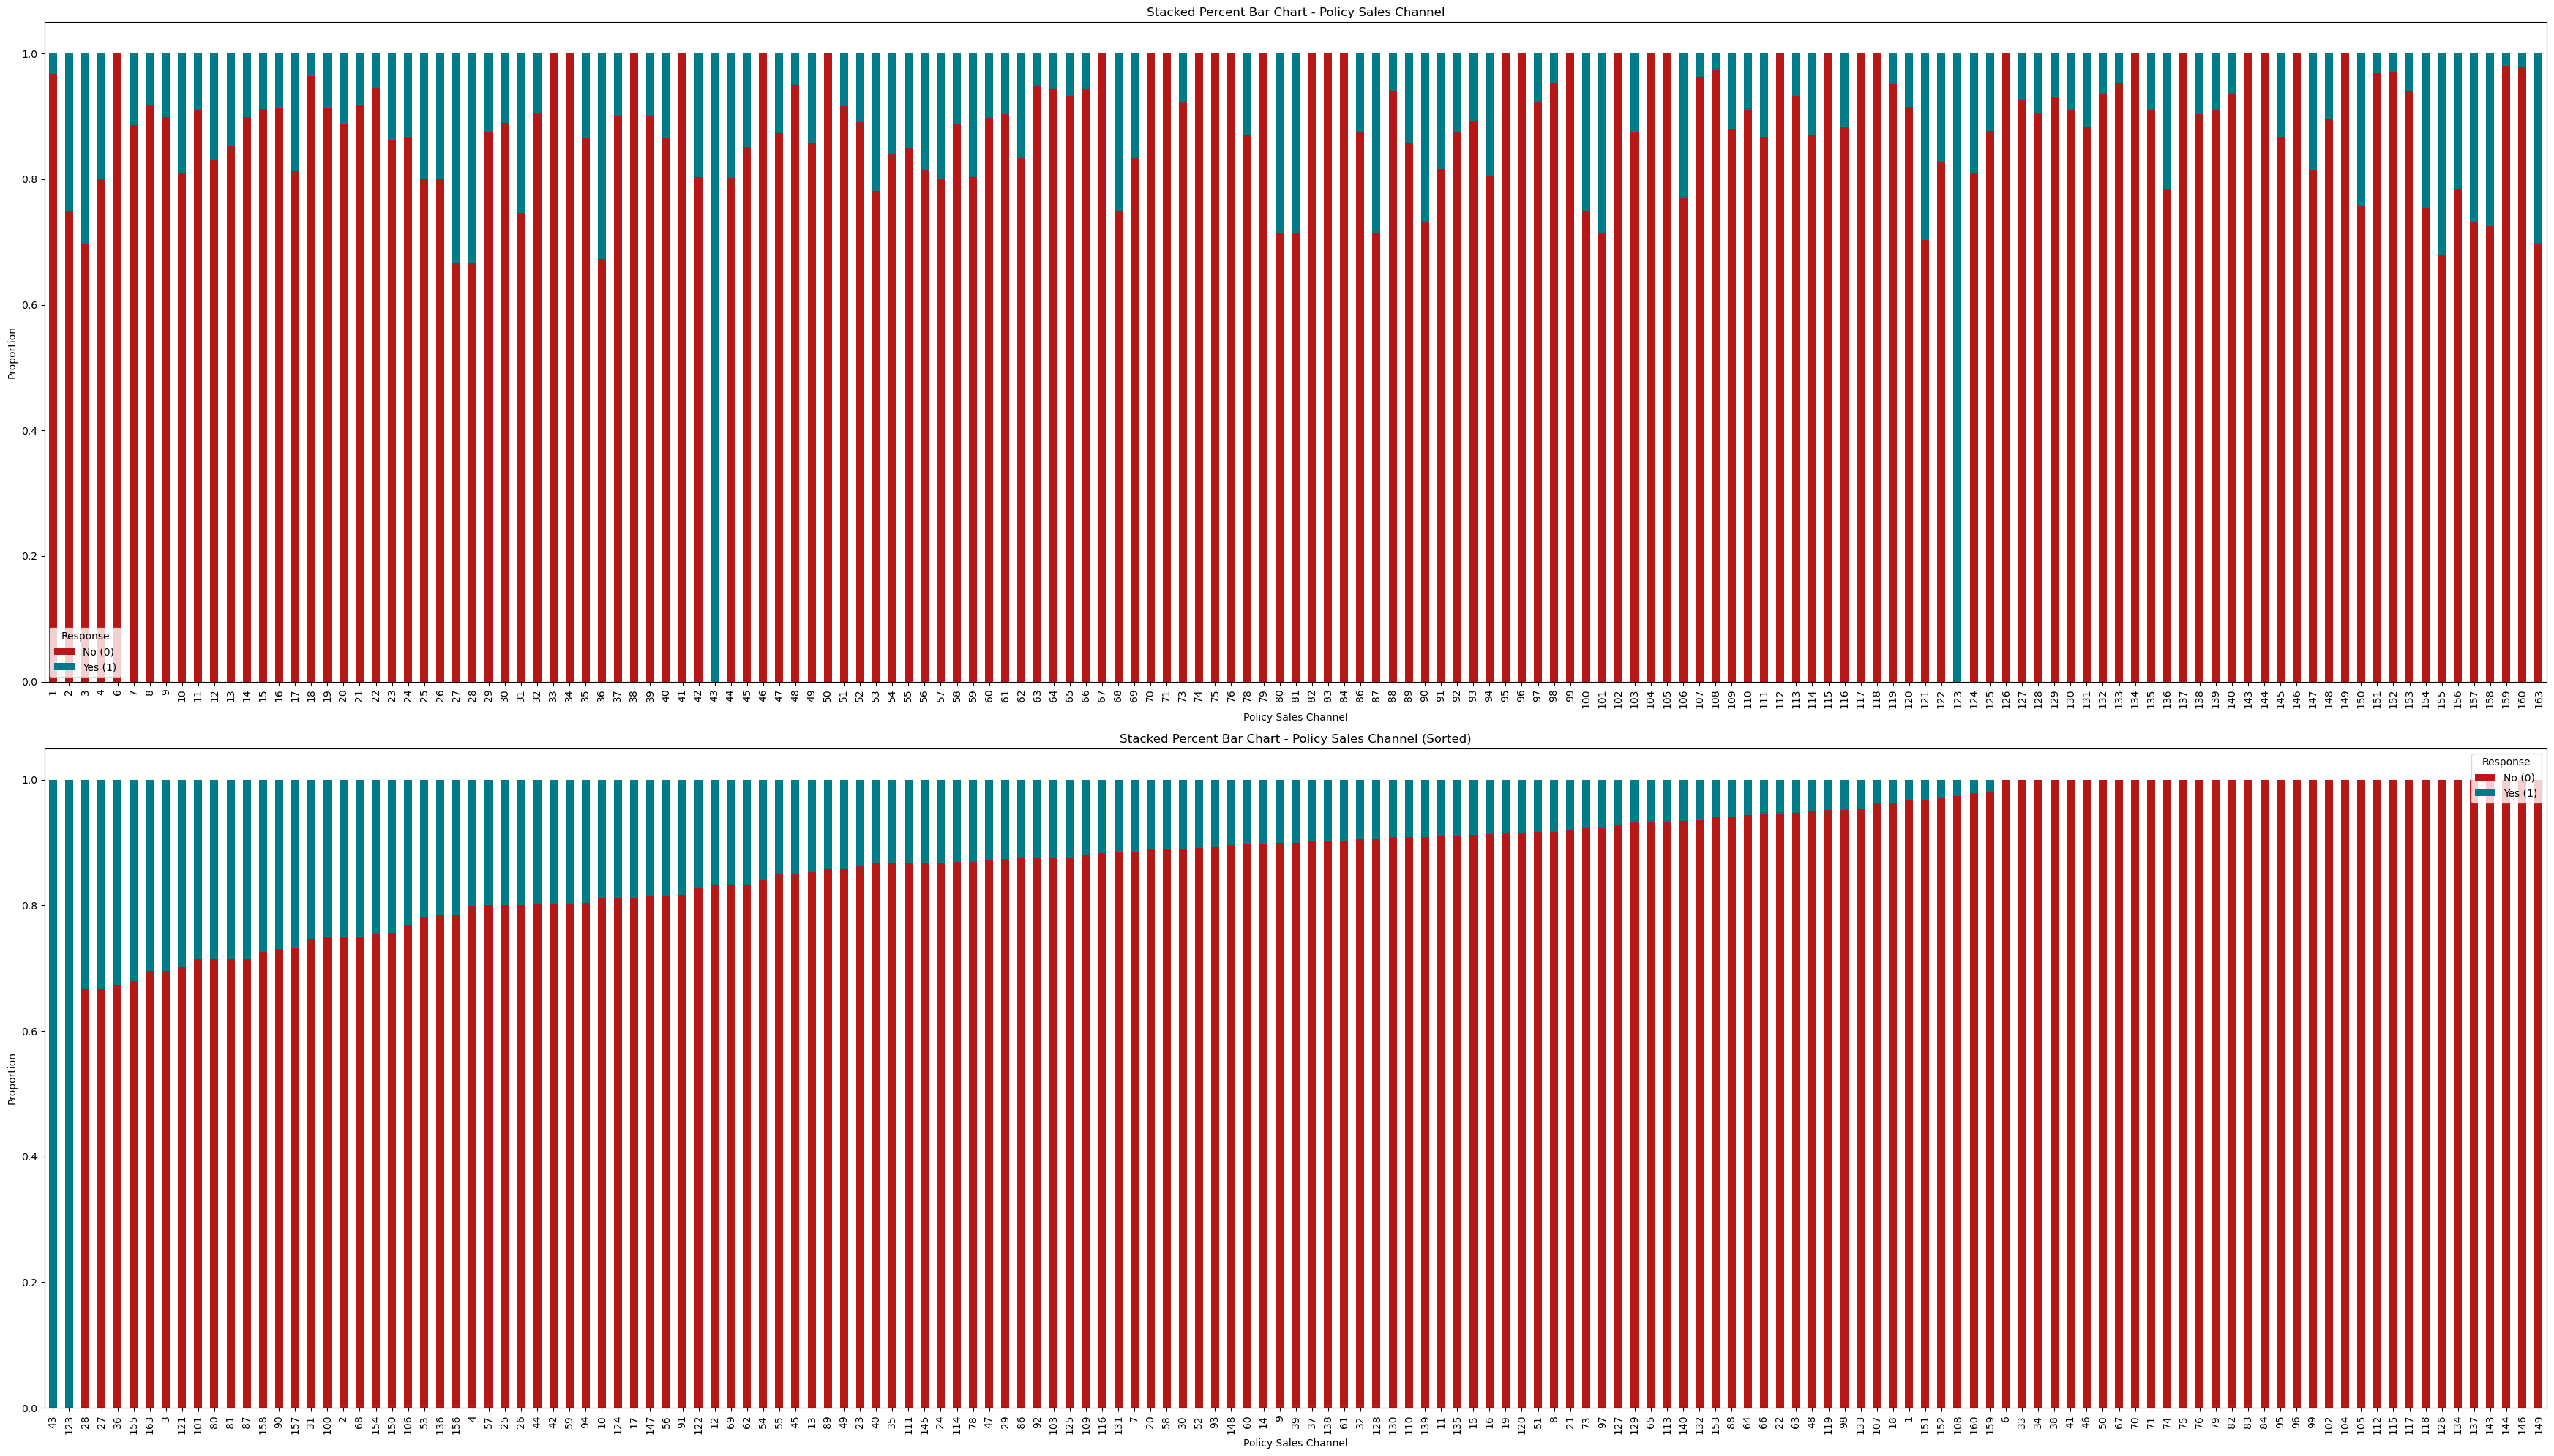

In [18]:
# Group and calculate the proportion within each Policy_Sales_Channel
aux = df3.groupby(['Policy_Sales_Channel', 'Response']).size().unstack()

# Normalize to get proportions
aux = aux.div(aux.sum(axis=1), axis=0)  

# Reset index to make 'Policy_Sales_Channel' a column again
aux = aux.reset_index()

# Convert Policy_Sales_Channel to integer
aux['Policy_Sales_Channel'] = aux['Policy_Sales_Channel'].astype(int)

# Criar a figura com 2 linhas e 1 coluna
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 20))  

# Gráfico 1: Sem ordenação
aux.set_index('Policy_Sales_Channel').plot(kind='bar', stacked=True, color=[color_neg, color_pos], ax=axes[0])
axes[0].set_title('Stacked Percent Bar Chart - Policy Sales Channel')
axes[0].set_xlabel('Policy Sales Channel')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Response', labels=['No (0)', 'Yes (1)'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Gráfico 2: Com ordenação pelo percentual de Response = 1 (Yes)
aux_sorted = aux.sort_values(by=1, ascending=False)
aux_sorted.set_index('Policy_Sales_Channel').plot(kind='bar', stacked=True, color=[color_neg, color_pos], ax=axes[1])
axes[1].set_title('Stacked Percent Bar Chart - Policy Sales Channel (Sorted)')
axes[1].set_xlabel('Policy Sales Channel')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Response', labels=['No (0)', 'Yes (1)'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Ajustar espaçamento entre gráficos
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 3.1.10 - Vintage

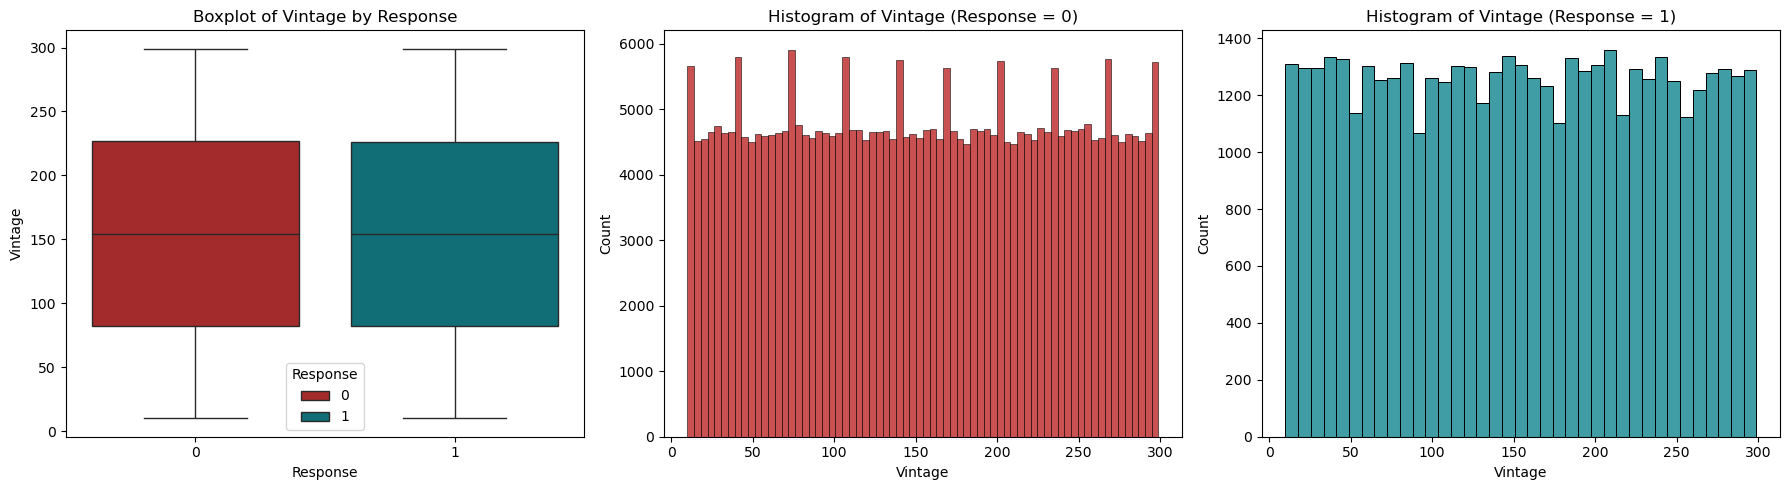

In [19]:
# Create the figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot for "Age" by "Response" with custom colors
sns.boxplot(x='Response', y='Vintage', data=df3, ax=axes[0], hue='Response', palette={0: color_neg, 1: color_pos})
axes[0].set_title('Boxplot of Vintage by Response')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Vintage')

# Histogram for "Age" when Response = 0
aux00 = df3.loc[df3['Response'] == 0, 'Vintage']
sns.histplot(aux00, ax=axes[1], color=color_neg)  
axes[1].set_title('Histogram of Vintage (Response = 0)')
axes[1].set_xlabel('Vintage')
axes[1].set_ylabel('Count')

# Histogram for "Age" when Response = 1
aux00 = df3.loc[df3['Response'] == 1, 'Vintage']
sns.histplot(aux00, ax=axes[2], color=color_pos)  
axes[2].set_title('Histogram of Vintage (Response = 1)')
axes[2].set_xlabel('Vintage')
axes[2].set_ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()

### 3.1.11 - Response 

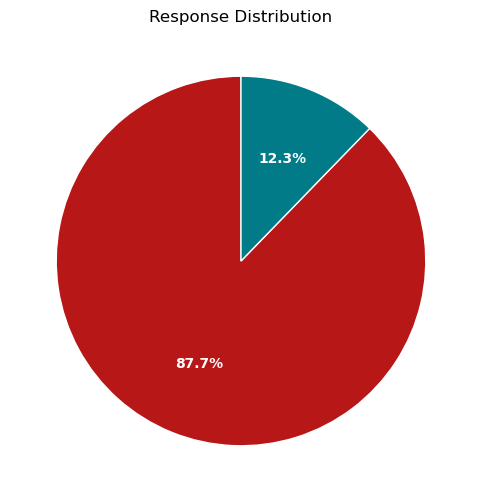

In [20]:
# Count occurrences of each Response category
response_counts = df3['Response'].value_counts()

# Define colors
colors = {0: color_neg, 1: color_pos}

# Create pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(response_counts, labels=response_counts.index, 
                                   autopct='%1.1f%%', colors=[colors[key] for key in response_counts.index], 
                                   startangle=90, wedgeprops={'edgecolor': 'white'},
                                   textprops={'weight': 'bold', 'color': 'white'})

# Title
plt.title('Response Distribution')

# Show plot
plt.show()

# 4.0. Data Preparation

In [21]:
# Separate the features (X) and target variable (y)
X = df3.drop('Response', axis=1)  # Remove the target column from the dataset
y = df3['Response'].copy()  # Create a copy of the target variable

# Split the dataset into training (80%) and validation (20%) sets
x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.20)

# Combine the training features and target variable into df4
df4 = pd.concat([x_train, y_train], axis=1)

## 4.1. Standardization

- During training, StandardScaler learns the mean and standard deviation to normalize data. We save it using pickle to ensure the same scaling is applied during deployment, preventing inconsistencies. At deployment, we only transform new data without recalculating statistics. Same will be applied to Rescaling and Transformation.

In [22]:
ss = pp.StandardScaler()
# annual premium - Standard Scaler
df4['Annual_Premium'] = ss.fit_transform( df4[['Annual_Premium']].values )
pickle.dump( ss, open('../features/encoding_annual_premium.pkl', 'wb') )

## 4.2. Rescaling

In [23]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age - MinMax Scaler
df4['Age'] = mms_age.fit_transform( df4[['Age']].values )
pickle.dump( mms_age, open( '../features/encoding_age.pkl', 'wb' ) )

# Vintage - MinMax Scaler
df4['Vintage'] = mms_vintage.fit_transform( df4[['Vintage']].values )
pickle.dump( mms_vintage, open( '../features/encoding_vintage.pkl', 'wb' ) )

## 4.3. Transformation

In [24]:
# Gender - One Hot Encoding / Target Encoding
target_encode_gender = df4.groupby('Gender')['Response'].mean()
df4.loc[:, 'Gender'] = df4['Gender'].map(target_encode_gender)
pickle.dump(target_encode_gender, open( '../features/encoding_gender.pkl' , 'wb') )

# Region_Code - Frequency Encoding / Target Encoding
target_encode_region_code = df4.groupby('Region_Code')['Response'].mean()
df4.loc[:, 'Region_Code'] = df4['Region_Code'].map(target_encode_region_code)
pickle.dump(target_encode_region_code, open('../features/encoding_region_code.pkl', 'wb') )

# Vehicle_Age - One Hot Encoding / Frequency Encoding
df4 = pd.get_dummies(df4, prefix='Vehicle_Age', columns=['Vehicle_Age'])

# Policy_Sales_Channel - Frequency Encoding / Target Encoding
fe_policy_sales_channel = df4.groupby('Policy_Sales_Channel').size() / len(df4)
df4.loc[:, 'Policy_Sales_Channel'] = df4['Policy_Sales_Channel'].map(fe_policy_sales_channel)
pickle.dump(fe_policy_sales_channel, open( '../features/encoding_policy_sales_channel.pkl','wb' ) )

## 4.4. Validation Data Preparation

In [25]:
# Encode 'Gender' using Target Encoding
x_val.loc[:, 'Gender'] = x_val.loc[:, 'Gender'].map(target_encode_gender)

# Scale 'Age' using MinMaxScaler
x_val.loc[:, 'Age'] = mms_age.transform(x_val[['Age']].values)

# Encode 'Region_Code' using Target Encoding
x_val.loc[:, 'Region_Code'] = x_val.loc[:, 'Region_Code'].map(target_encode_region_code)

# Apply One-Hot Encoding to 'Vehicle_Age'
x_val = pd.get_dummies(x_val, prefix='Vehicle_Age', columns=['Vehicle_Age'])

# Scale 'Annual_Premium' using StandardScaler
x_val.loc[:, 'Annual_Premium'] = ss.transform(x_val[['Annual_Premium']].values)

# Encode 'Policy_Sales_Channel' using Frequency Encoding
x_val.loc[:, 'Policy_Sales_Channel'] = x_val['Policy_Sales_Channel'].map(fe_policy_sales_channel)

# Scale 'Vintage' using MinMaxScaler
x_val.loc[:, 'Vintage'] = mms_vintage.transform(x_val[['Vintage']].values)

# Fill missing values with 0
x_val = x_val.fillna(0)

C:\Users\thoma\AppData\Local\Temp\ipykernel_5184\4058316331.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.41538462 0.13846154 0.52307692 ... 0.44615385 0.03076923 0.63076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_val.loc[:, 'Age'] = mms_age.transform(x_val[['Age']].values)
C:\Users\thoma\AppData\Local\Temp\ipykernel_5184\4058316331.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.51557093 0.64013841 0.66089965 ... 0.32525952 0.53633218 0.93425606]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_val.loc[:, 'Vintage'] = mms_vintage.transform(x_val[['Vintage']].values)
C:\Users\thoma\AppData\Local\Temp\ipykernel_5184\4058316331.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chang

# 5.0. Feature Selection

## 5.1. Tree-Based Model Feature Importance

In [26]:
# model definition
et_model = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df4.drop( ['id', 'Response'], axis=1 )
y_train_n = y_train.values
et_model.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking
                        feature  importance
0                       Vintage    0.272927
0                Annual_Premium    0.244060
0                           Age    0.165654
0                   Region_Code    0.105629
0                Vehicle_Damage    0.068270
0          Policy_Sales_Channel    0.060082
0            Previously_Insured    0.055949
0      Vehicle_Age_below_1_year    0.013686
0  Vehicle_Age_between_1_2_year    0.006309
0                        Gender    0.004548
0      Vehicle_Age_over_2_years    0.002400
0               Driving_License    0.000487




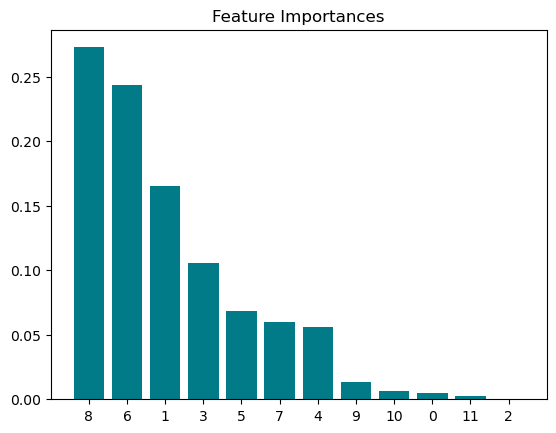

In [27]:
importances = et_model.feature_importances_
indices = np.argsort( importances )[::-1]

print( 'Feature Ranking')
df = pd.DataFrame()

for i, j in zip( x_train_n, et_model.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )
print('\n')

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="#007b87", align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 6.0. Machine Learning Model

This is not a traditional classification problem, where conventional metrics like F1-score, confusion matrix, or ROC curve are relevant. The focus here is on improving the ranking of individuals, meaning ordering people by their likelihood to purchase so that, when approached, the goal is to reach the highest number of interested individuals with the least effort possible. The main metric used is the Cumulative Gain curve, which assesses how the ordered list allows capturing the highest number of interested individuals by targeting a small portion of the base, optimizing the order based on the likelihood of purchase.

In other words, a Learn to Rank problem aims to sort entities according to a specific metric. In this case, the objective is to rank customers based on the Response metric.

In [28]:
# Selecting the most relevant features
cols_selected = ['Annual_Premium',
                 'Vintage',
                 'Age',
                 'Region_Code',
                 'Vehicle_Damage',
                 'Previously_Insured',
                 'Policy_Sales_Channel']

# Keeping original x_val
x_validation = x_val

# Selecting just the chosen features
x_train = df4[ cols_selected ]
x_val = x_val[ cols_selected ]

## 6.1. K-NN

In [29]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model predicion
yhat_knn = knn_model.predict_proba( x_val )

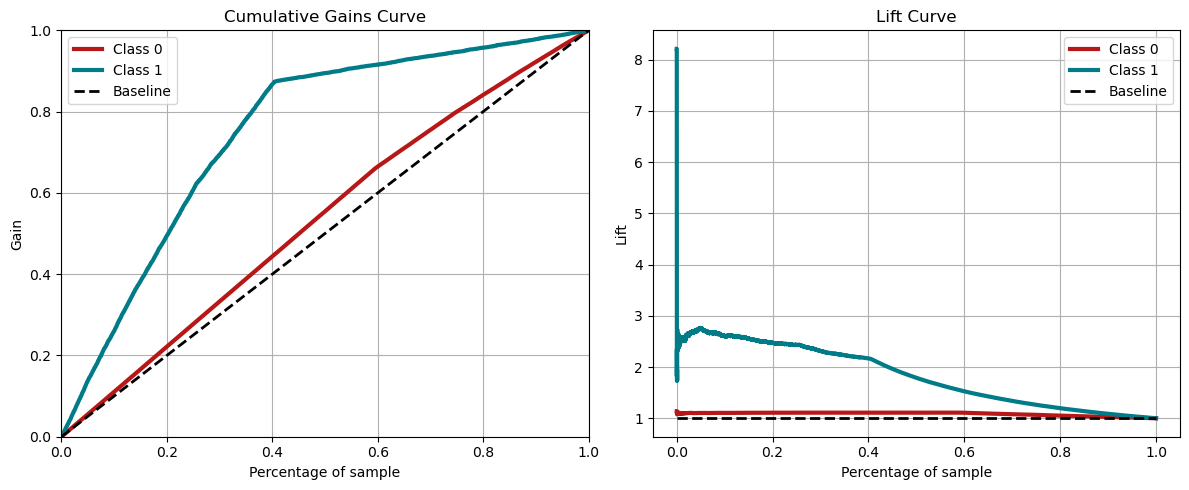

In [30]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn, ax=axes[0])
axes[0].set_title("Cumulative Gains Curve")

# Change line colors
axes[0].lines[0].set_color(color_neg)
axes[0].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='best')

# Plot Lift Curve
skplt.metrics.plot_lift_curve(y_val, yhat_knn, ax=axes[1])
axes[1].set_title("Lift Curve")

# Change line colors
axes[1].lines[0].set_color(color_neg)
axes[1].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 6.2. Logistic Regression

In [31]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 )

# model training
lr_model.fit( x_train, y_train )

# model predicion
yhat_lr = lr_model.predict_proba( x_val )

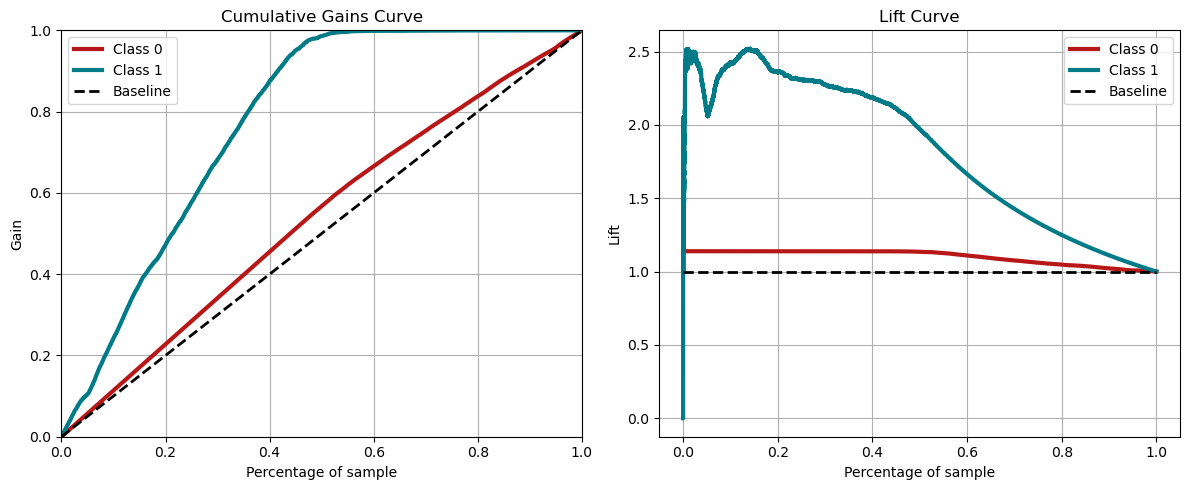

In [32]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr, ax=axes[0])
axes[0].set_title("Cumulative Gains Curve")

# Change line colors
axes[0].lines[0].set_color(color_neg)
axes[0].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='best')

# Plot Lift Curve
skplt.metrics.plot_lift_curve(y_val, yhat_lr, ax=axes[1])
axes[1].set_title("Lift Curve")

# Change line colors
axes[1].lines[0].set_color(color_neg)
axes[1].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 6.3. ExtraTrees

In [33]:
# model definition
et_model = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model training
et_model.fit( x_train, y_train )

# model predicion
yhat_et = et_model.predict_proba( x_val )

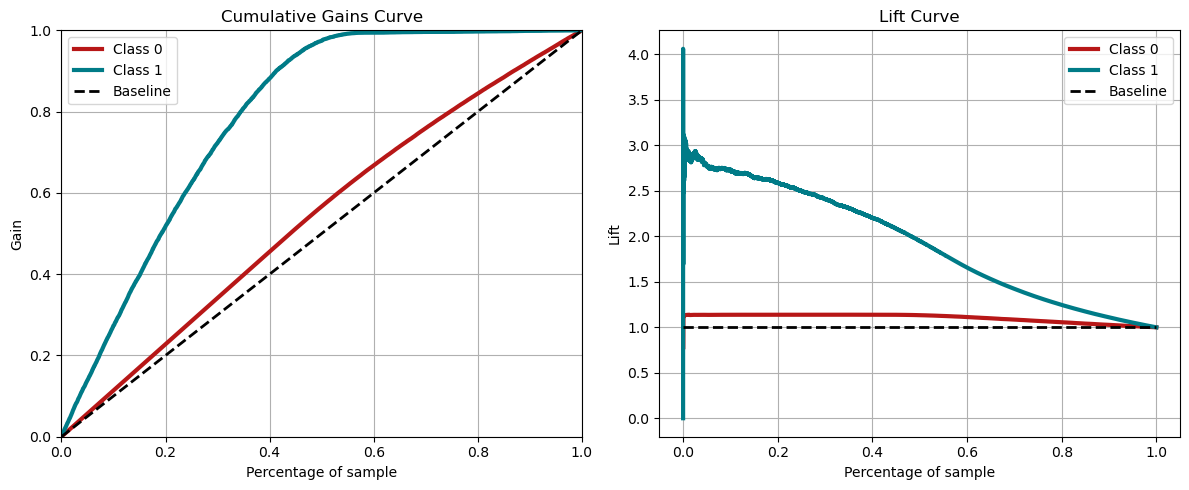

In [34]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_val, yhat_et, ax=axes[0])
axes[0].set_title("Cumulative Gains Curve")

# Change line colors
axes[0].lines[0].set_color(color_neg)
axes[0].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='best')

# Plot Lift Curve
skplt.metrics.plot_lift_curve(y_val, yhat_et, ax=axes[1])
axes[1].set_title("Lift Curve")

# Change line colors
axes[1].lines[0].set_color(color_neg)
axes[1].lines[1].set_color(color_pos)

# Update legend colors
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# 7.0 Model Performance

In [33]:
def precision_at_k(data, target_col, k=2000):
    #Reset Index
    data = data.reset_index(drop=True)

    # Create ranking order
    data['Ranking'] =  data.index + 1

    data['Precision_at_k'] = data[target_col].cumsum() / data['Ranking']

    return data.loc[k, 'Precision_at_k']


def recall_at_k(data, target_col, k=2000):
    #Reset Index
    data = data.reset_index(drop=True)

    # Create ranking order
    data['Ranking'] =  data.index + 1

    data['Recall_at_k'] = data[target_col].cumsum() / data[target_col].sum()

    return data.loc[k, 'Recall_at_k']

In [34]:
# Copy Data
df7 = x_validation.copy()
df7['Response'] = y_val.copy()

# Propensity Score
df7['Score'] = yhat_lr[:, 1].tolist()

# Sorte Client by propensity Score
df7  = df7.sort_values( 'Score', ascending=False )

precision_at_k(df7, 'Response', k=500)

0.3033932135728543

In [35]:
recall_at_k(df7, 'Response', k=500)

0.016375781081663435

In [36]:
df7[['id', 'Response', 'Score']].head(50)

,id,Response,Score
15024,15025,0,0.375086
265733,265734,0,0.359499
203749,203750,0,0.358703
159816,159817,1,0.352035
160428,160429,0,0.350665
336886,336887,0,0.347528
123842,123843,0,0.346118
326571,326572,1,0.346026
83115,83116,0,0.345991
85488,85489,0,0.345912


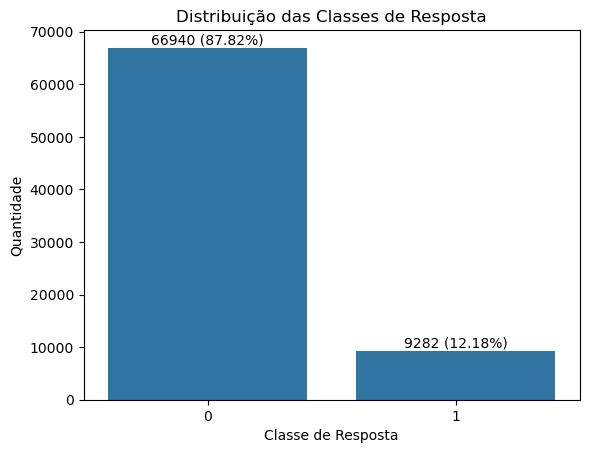

In [37]:
# Contar a quantidade de registros por classe
class_counts = df7['Response'].value_counts()

# Calcular as porcentagens
class_percentage = (class_counts / class_counts.sum()) * 100

# Criar o gráfico de barras
sns.barplot(x=class_counts.index, y=class_counts.values)

# Adicionar título e labels
plt.title('Distribuição das Classes de Resposta')
plt.xlabel('Classe de Resposta')
plt.ylabel('Quantidade')

# Adicionar valor e porcentagem em cada barra
for i, count in enumerate(class_counts.values):
    percentage = class_percentage[i]
    plt.text(i, count + 100, f'{count} ({percentage:.2f}%)', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [ ]:
76221/4

# 8.0 Deploy to Production

## 8.1 Health Insurance Class

- For the deployment phase, we load the previously saved StandardScaler using pickle to ensure consistency in data scaling. The saved scaler applies the same transformation (mean and standard deviation) to the incoming data, ensuring that new data is standardized in the same way as the training data, maintaining model performance. This approach is also applied to rescaling and transformation steps, ensuring that all preprocessing is consistent and aligned with the training process.

## 8.2 API Handler

## 8.2 API Tester

In [39]:
import requests
import json
import pandas as pd

# Simulação do dataset de teste
df_test = x_val
df_test['Response'] = y_val
df_test = df_test.sample(10)

# Converte para JSON
data = json.dumps(df_test.to_dict(orient='records'))

# Chamada da API no Railway
url = 'https://healthinsuranceapp-production.up.railway.app/predict'  # URL do seu app
headers = {'Content-type': 'application/json'}

# Fazendo a requisição
r = requests.post(url, data=data, headers=headers)

# Exibindo o status e os resultados
print(f'Status Code: {r.status_code}')
if r.status_code == 200:
    d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
    print(d1.sort_values('Score', ascending=False).head())
else:
    print(f'Erro na requisição: {r.text}')


C:\Users\thoma\AppData\Local\Temp\ipykernel_5184\1648884279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Response'] = y_val


Status Code: 500
Erro na requisição: <!doctype html>
<html lang=en>
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

